In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
ignorelist=('nav_lat','nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'bounds_lon','bounds_lat',
            'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 
            'time_counter', 'time_counter_bounds','nav_lat_grid_T', 'nav_lon_grid_T', 
            'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 
            'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 
            'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds',
            'depthu', 'depthu_bounds','depthv', 'depthv_bounds','depthw', 'depthw_bounds',
            'layer6m_W', 'layer6m_W_bounds','bounds_lon_grid_T','bounds_lat_grid_T',
            'bounds_lon_grid_W','bounds_lat_grid_W','time_instant_bounds','time_instant')
def checkall(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            #print(var)
            if len(np.shape(ff.variables[var]))==4:
                print(var,':',np.min(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])),
                      np.max(np.ma.masked_where(tmask[:,:,:]==0,ff.variables[var][-1,:,:,:])))
            elif len(np.shape(ff.variables[var]))==3:
                print(var,':',np.min(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])),
                      np.max(np.ma.masked_where(tmask[0,:,:]==0,ff.variables[var][-1,:,:])))
            else: 
                print('unknown shape: ',var,len(np.shape(ff.variables[var])))
def checkallSlice(ff):
    fkeys=ff.variables.keys()
    print('fP.variables.keys():',fkeys)
    print('Min/Max:')
    for var in fkeys:
        if var not in ignorelist:
            print(var,':',np.min(ff.variables[var][-1,:,:,:]),
                      np.max(ff.variables[var][-1,:,:,:]))

In [3]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

In [4]:
idir='/data/eolson/results/MEOPAR/SS36runs/GrahamRuns/tvdTest2/'
ts=dt.datetime(2015,4,1)
te=dt.datetime(2015,4,20)

In [5]:
fVlist=et.index_model_files_flex(idir,'ptrc_T','1d','long',ts,te)

In [6]:
fPlist=et.index_model_files_flex(idir,'dian_T','1d','long',ts,te)
fDlist=et.index_model_files_flex(idir,'dia1_T','1d','long',ts,te)
fSlist=et.index_model_files_flex(idir,'snp_T','1d','long',ts,te)
fRlist=et.index_model_files_flex(idir,'rad_T','1d','long',ts,te)

In [7]:
fPlist.head()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11


In [8]:
fDlist.head()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11


In [9]:
fSlist.tail()

,paths,t_0,t_n
0,/data/eolson/results/MEOPAR/SS36runs/GrahamRun...,2015-04-01,2015-04-11


In [10]:
with nc.Dataset(fVlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'depthw', 'depthw_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'nitrate', 'ammonium', 'silicon', 'diatoms', 'ATZ_DIAT', 'ATZ_PON', 'ATZ_NO3', 'NO3TVDZ'])
Min/Max:
nitrate : 0.0 34.017643
ammonium : 0.0 4.3023624
silicon : 0.0 74.31455
diatoms : 0.0 9.928709
ATZ_DIAT : -1920.248 2194.6135
ATZ_PON : -842.07465 822.995
ATZ_NO3 : -255462.08 381696.84
NO3TVDZ : -255462.08 381696.84


In [11]:
with nc.Dataset(fPlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RIV_NO3', 'RIV_DIAT', 'REM_NO3', 'PRD_NO3'])
Min/Max:
RIV_NO3 : 0.0 11335.639
RIV_DIAT : 0.0 1.4559184
REM_NO3 : 0.0 6.76961
PRD_NO3 : -0.835698 0.0


In [12]:
with nc.Dataset(fDlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat_grid_T', 'nav_lon_grid_T', 'bounds_nav_lon_grid_T', 'bounds_nav_lat_grid_T', 'area_grid_T', 'deptht', 'deptht_bounds', 'nav_lat_grid_W', 'nav_lon_grid_W', 'bounds_nav_lon_grid_W', 'bounds_nav_lat_grid_W', 'area_grid_W', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ATF_NO3', 'ATF_DIAT', 'BFX_PON', 'BFX_DIAT'])
Min/Max:
ATF_NO3 : -0.8008411 0.6374324
ATF_DIAT : -0.10252714 0.14924224
BFX_PON : -2315.1606 0.0
BFX_DIAT : -1054.8256 0.0


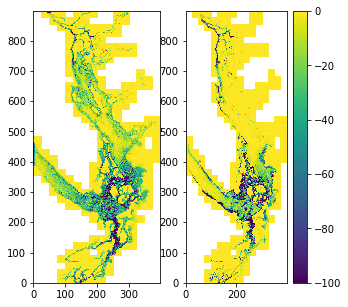

In [13]:
fig,ax=plt.subplots(1,2,figsize=(5,5))
with nc.Dataset(fDlist.paths[0]) as ff:
    m=ax[0].pcolormesh(ff.variables['BFX_PON'][0,:,:],vmin=-100,vmax=0)
    ax[1].pcolormesh(ff.variables['BFX_DIAT'][0,:,:],vmin=-100,vmax=0)
fig.colorbar(m)

In [14]:
with nc.Dataset(fSlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_instant', 'time_instant_bounds', 'time_counter', 'time_counter_bounds', 'NO3_E3TSNAP', 'DIAT_E3TSNAP'])
Min/Max:
NO3_E3TSNAP : 0.0 898.76733
DIAT_E3TSNAP : 0.0 12.49793


In [15]:
with nc.Dataset(fRlist.paths[0]) as ff:
    checkall(ff)

fP.variables.keys(): dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'RDB_NO3', 'RDB_DIAT', 'RDN_NO3', 'RDN_DIAT'])
Min/Max:
RDB_NO3 : 0.0 0.0
RDB_DIAT : 0.0 0.10070252
RDN_NO3 : 0.0 0.0
RDN_DIAT : 0.0 1.0234274


In [16]:
rivNO3Sum=list(); rivDIATSum=list(); nitrSum=list();  prdNO3Sum=list(); 

radSum=list();
for i,r in fPlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            rivNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NO3'][:,:,:,:],3),2),1))
            rivDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_DIAT'][:,:,:,:],3),2),1))
            nitrSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REM_NO3'][:,:,:,:],3),2),1))
            prdNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NO3'][:,:,:,:],3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            rivNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_NO3'][:iiend,:,:,:],3),2),1))
            rivDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['RIV_DIAT'][:iiend,:,:,:],3),2),1))
            nitrSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['REM_NO3'][:iiend,:,:,:],3),2),1))
            prdNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['PRD_NO3'][:iiend,:,:,:],3),2),1))
rivNO3Sum=np.concatenate(rivNO3Sum,axis=0)
rivDIATSum=np.concatenate(rivDIATSum,axis=0)
nitrSum=np.concatenate(nitrSum,axis=0)
prdNO3Sum=np.concatenate(prdNO3Sum,axis=0)

In [17]:
radNO3Sum=list();radDIATSum=list(); 
for i,r in fRlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            radNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_NO3'][:,:,:,:]+\
                                                            f.variables['RDN_NO3'][:,:,:,:]),3),2),1))
            radDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_DIAT'][:,:,:,:]+\
                                                            f.variables['RDN_DIAT'][:,:,:,:]),3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            radNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_NO3'][:iiend,:,:,:]+\
                                                            f.variables['RDN_NO3'][:iiend,:,:,:]),3),2),1))
            radDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*(f.variables['RDB_DIAT'][:iiend,:,:,:]+\
                                                            f.variables['RDN_DIAT'][:iiend,:,:,:]),3),2),1))
radNO3Sum=np.concatenate(radNO3Sum,axis=0)
radDIATSum=np.concatenate(radDIATSum,axis=0)

In [18]:
ATFNO3Sum=list(); ATFDIATSum=list(); 
BFXPONSum=list(); BFXDIATSum=list();
for i,r in fDlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:,:,:,:],3),2),1))
            ATFDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DIAT'][:,:,:,:],3),2),1))
            BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_PON'][:,:,:],2),1))
            BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_DIAT'][:,:,:],2),1))
        else:
            iiend=(te-r['t_0']).days+1
            ATFNO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_NO3'][:iiend,:,:,:],3),2),1))
            ATFDIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*f.variables['ATF_DIAT'][:iiend,:,:,:],3),2),1))
            BFXPONSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_PON'][:iiend,:,:],2),1))
            BFXDIATSum.append(np.sum(np.sum(tmaskSOG[:,0,:,:]*f.variables['BFX_DIAT'][:iiend,:,:],2),1))
ATFNO3Sum=np.concatenate(ATFNO3Sum,axis=0)
ATFDIATSum=np.concatenate(ATFDIATSum,axis=0)
BFXPONSum=np.concatenate(BFXPONSum,axis=0)
BFXDIATSum=np.concatenate(BFXDIATSum,axis=0)

In [19]:
np.shape(e1t)

(1, 1, 898, 398)

In [20]:
NO3Sum=list(); DIATSum=list(); 
for i,r in fSlist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            NO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1))
            DIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['DIAT_E3TSNAP'][:,:,:,:],3),2),1))
        else:
            iiend=(te-r['t_0']).days+1
            NO3Sum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['NO3_E3TSNAP'][:iiend,:,:,:],3),2),1))
            DIATSum.append(np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*f.variables['DIAT_E3TSNAP'][:iiend,:,:,:],3),2),1))
NO3Sum=np.concatenate(NO3Sum,axis=0)
DIATSum=np.concatenate(DIATSum,axis=0)

In [21]:
NO3diff=(NO3Sum[1:]-NO3Sum[:-1])/(24*3600)
DIATdiff=(DIATSum[1:]-DIATSum[:-1])/(24*3600)

Text(0.5, 1.0, 'DIAT')

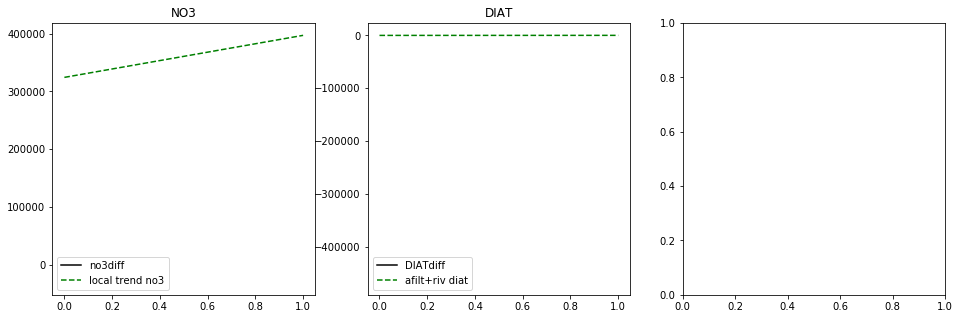

In [22]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(prdNO3Sum)),prdNO3Sum+nitrSum+ATFNO3Sum+rivNO3Sum,'g--',label='local trend no3')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,len(DIATdiff)+1),DIATdiff,'k-',label='DIATdiff')
ax[1].plot(range(0,len(ATFDIATSum)),ATFDIATSum+rivDIATSum,'g--',label='afilt+riv diat')
ax[1].legend()
ax[1].set_title('DIAT')

In [23]:
varsXr={'ATNO3':'ATX_NO3', 'ATDIAT':'ATX_DIAT', 
        'DTNO3':'DTX_NO3', 'DTDIAT':'DTX_DIAT'}
varsYr={'ATNO3':'ATY_NO3', 'ATDIAT':'ATY_DIAT', 
        'DTNO3':'DTY_NO3', 'DTDIAT':'DTY_DIAT'}
varsX = {v: k for k, v in varsXr.items()}
varsY = {v: k for k, v in varsYr.items()}
locs=('mal','har','sjc','ros','dis','sut')
dirs={'mal':-1,'har':1,'sjc':1,'ros':1,'dis':-1,'sut':-1} # in or out of domain
transps=dict();
fnames={'mal':'Malaspina_U','har':'Haro_V','sjc':'SJC_V','ros':'Rosario_V','dis':'Discovery_V','sut':'Sutil_V'}
for iloc in locs:
    transps[iloc]=dict()

In [24]:
for ivar, inam in varsX.items():
    print(ivar,inam)

ATX_NO3 ATNO3
ATX_DIAT ATDIAT
DTX_NO3 DTNO3
DTX_DIAT DTDIAT


In [25]:
# x-dir
iloc='mal'
flist=et.index_model_files_flex(idir,'Malaspina_U','1d','long',ts,te)
vls=dict()
for inam in varsX.values():
    vls[inam]=list()
for i,r in flist.iterrows():
    with nc.Dataset(r['paths']) as f:
        if r['t_n']<(te+dt.timedelta(days=1)):
            for ivar, inam in varsX.items():
                vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,:,0],2),1))
        else:
            iiend=(te-r['t_0']).days+1
            for ivar, inam in varsX.items():
                vls[inam].append(np.sum(np.sum(f.variables[ivar][:iiend,:,:,0],2),1))
for inam in varsX.values():
    transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

In [26]:
for iloc in ('har','sjc','ros','dis','sut'): # y-dir
    flist=et.index_model_files_flex(idir,fnames[iloc],'1d','long',ts,te)
    vls=dict()
    for inam in varsY.values():
        vls[inam]=list()
    for i,r in flist.iterrows():
        with nc.Dataset(r['paths']) as f:
            if r['t_n']<(te+dt.timedelta(days=1)):
                for ivar, inam in varsY.items():
                    vls[inam].append(np.sum(np.sum(f.variables[ivar][:,:,0,:],2),1))
            else:
                iiend=(te-r['t_0']).days+1
                for ivar, inam in varsY.items():
                    vls[inam].append(np.sum(np.sum(f.variables[ivar][:iiend,:,0,:],2),1))
    for inam in varsY.values():
        transps[iloc][inam]=dirs[iloc]*np.concatenate(vls[inam],axis=0)

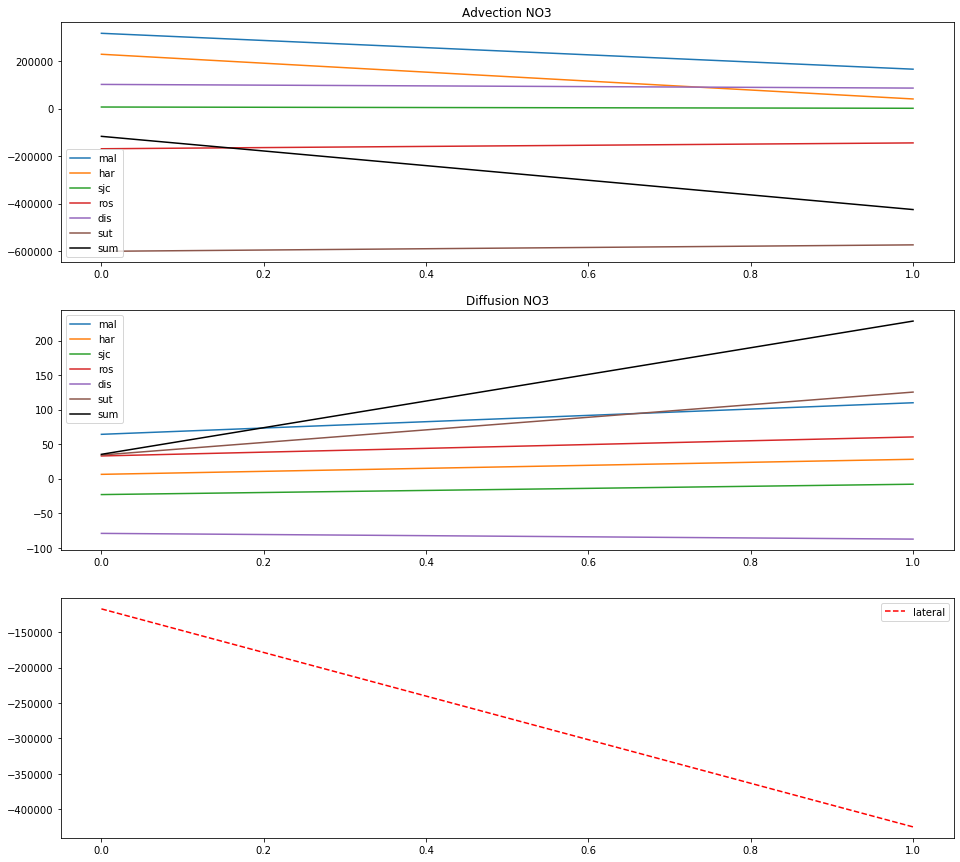

In [27]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advNO3=np.zeros(np.shape(transps['mal']['ATNO3']))
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),transps[iloc]['ATNO3'],label=iloc)
    advNO3=advNO3+transps[iloc]['ATNO3']
ax[0].plot(range(0,len(transps[iloc]['ATNO3'])),advNO3,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection NO3')

difNO3=np.zeros(np.shape(transps['mal']['DTNO3']))
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),transps[iloc]['DTNO3'],label=iloc)
    difNO3=difNO3+transps[iloc]['DTNO3']
ax[1].plot(range(0,len(transps[iloc]['DTNO3'])),difNO3,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion NO3')

#ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),PHSNO3Sum,'k-',label='phys')
ax[2].plot(range(0,len(transps[iloc]['DTNO3'])),advNO3+difNO3,'r--',label='lateral')
ax[2].legend()

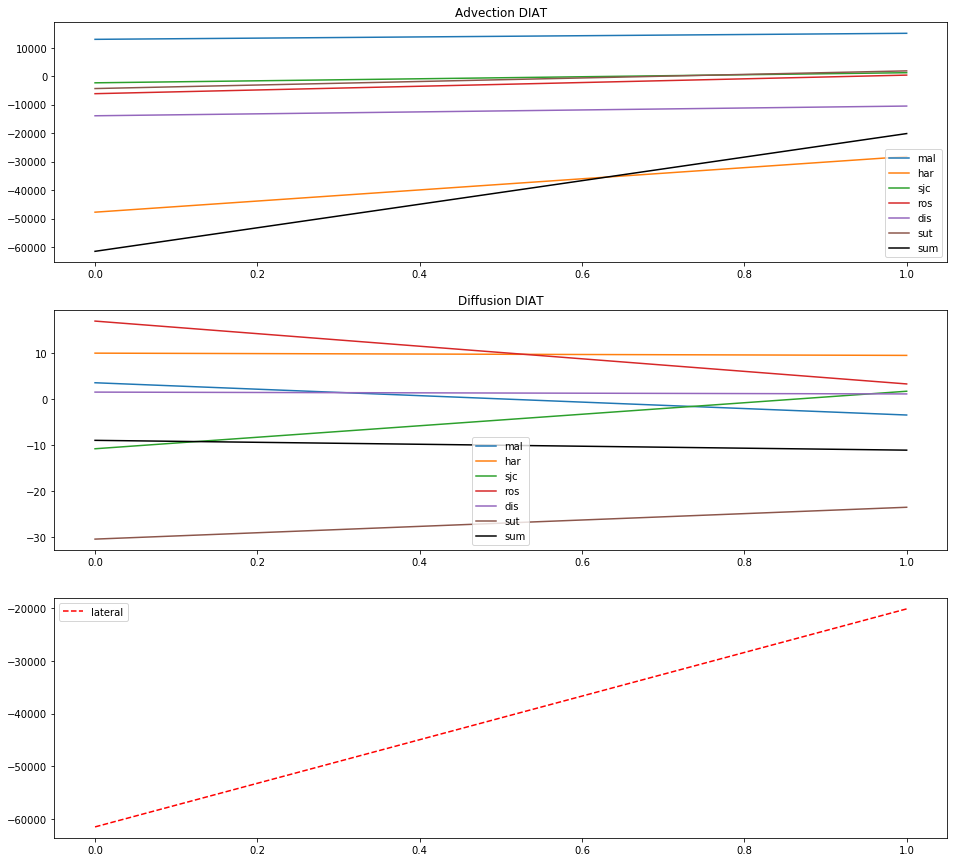

In [28]:
fig,ax=plt.subplots(3,1,figsize=(16,15))
advDIAT=np.zeros(np.shape(transps['mal']['ATDIAT']))
for iloc in locs:
    ax[0].plot(range(0,len(transps[iloc]['ATDIAT'])),transps[iloc]['ATDIAT'],label=iloc)
    advDIAT=advDIAT+transps[iloc]['ATDIAT']
ax[0].plot(range(0,len(transps[iloc]['ATDIAT'])),advDIAT,'k-',label='sum')
ax[0].legend()
ax[0].set_title('Advection DIAT')

difDIAT=np.zeros(np.shape(transps['mal']['DTDIAT']))
for iloc in locs:
    ax[1].plot(range(0,len(transps[iloc]['DTDIAT'])),transps[iloc]['DTDIAT'],label=iloc)
    difDIAT=difDIAT+transps[iloc]['DTDIAT']
ax[1].plot(range(0,len(transps[iloc]['DTDIAT'])),difDIAT,'k-',label='sum')
ax[1].legend()
ax[1].set_title('Diffusion DIAT')

ax[2].plot(range(0,len(transps[iloc]['DTDIAT'])),advDIAT+difDIAT,'r--',label='lateral')
ax[2].legend()

Text(0.5, 1.0, 'DIAT')

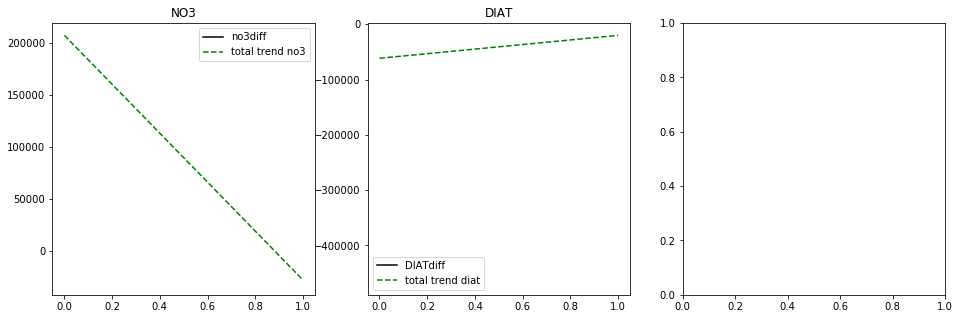

In [29]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,len(NO3diff)+1),NO3diff,'k-',label='no3diff')
ax[0].plot(range(0,len(prdNO3Sum)),prdNO3Sum+nitrSum+ATFNO3Sum+rivNO3Sum+difNO3+advNO3,'g--',label='total trend no3')
ax[0].legend()
ax[0].set_title('NO3')
ax[1].plot(range(1,len(DIATdiff)+1),DIATdiff,'k-',label='DIATdiff')
ax[1].plot(range(0,len(ATFDIATSum)),ATFDIATSum+rivDIATSum+difDIAT+advDIAT,'g--',label='total trend diat')
ax[1].legend()
ax[1].set_title('DIAT')

## Sums

In [ ]:
print('NO3, Mmol/year')
print('Lateral Transport, Advection:\n', np.sum(advNO3)*24*3600*1e-12)
print('Lateral Transport, Mixing: \n',np.sum(difNO3)*24*3600*1e-12)
print('Rivers:\n',np.sum(rivNO3Sum)*24*3600*1e-12)
print('Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12)
print('Asselin Filter:\n',np.sum(ATFNO3Sum)*24*3600*1e-12)
print('Net change:\n',(np.sum(advNO3)+np.sum(difNO3)+np.sum(rivNO3Sum)+np.sum(prdNO3Sum)+np.sum(nitrSum)+\
                      np.sum(ATFNO3Sum))*24*3600*1e-12)

In [ ]:
print('NO3, Mmol/year, ATF-Corrected version')
print('Lateral Transport, Advection:\n', np.sum(advNO3)*24*3600*1e-12)
print('Lateral Transport, Mixing: \n',np.sum(difNO3)*24*3600*1e-12)
print('Rivers:\n',np.sum(rivNO3Sum)*24*3600*1e-12)
print('NO3-based Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12)
print('NH4-based Primary Production: \n',np.sum(prdNH4Sum)*24*3600*1e-12)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12)
print('Net change:\n',(np.sum(advNO3)+np.sum(difNO3)+np.sum(rivNO3Sum)+np.sum(prdNO3Sum)+np.sum(nitrSum)\
                      )*24*3600*1e-12)

In [ ]:
print('DIN (NH4+NO3) from Rivers:',(np.sum(rivNO3Sum)+np.sum(rivNH4Sum))*24*3600*1e-12)

In [ ]:
# Haro:
print('Haro Strait NO3:',(np.sum(transps['har']['ATNO3']))*24*3600*1e-12)
print('Haro Strait NH4:',(np.sum(transps['har']['ATNH4']))*24*3600*1e-12)
print('Haro Strait DIN:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['har']['ATNH4']))*24*3600*1e-12)
print('Haro Strait PON:',(np.sum(transps['har']['ATPON']))*24*3600*1e-12)
print('Haro Strait DON:',(np.sum(transps['har']['ATDON']))*24*3600*1e-12)
print('Haro Strait Living:',(np.sum(transps['har']['ATLIV']))*24*3600*1e-12)

In [ ]:
# Southern Passages:
print('Southern NO3:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['sjc']['ATNO3'])+np.sum(transps['ros']['ATNO3']))*24*3600*1e-12)
print('Southern NH4:',(np.sum(transps['har']['ATNH4'])+np.sum(transps['sjc']['ATNH4'])+np.sum(transps['ros']['ATNH4']))*24*3600*1e-12)
print('Southern DIN:',(np.sum(transps['har']['ATNO3'])+np.sum(transps['sjc']['ATNO3'])+np.sum(transps['ros']['ATNO3'])+\
                       np.sum(transps['har']['ATNH4'])+np.sum(transps['sjc']['ATNH4'])+np.sum(transps['ros']['ATNH4']))*24*3600*1e-12)
print('Southern PON:',(np.sum(transps['har']['ATPON'])+np.sum(transps['sjc']['ATPON'])+np.sum(transps['ros']['ATPON']))*24*3600*1e-12)
print('Southern DON:',(np.sum(transps['har']['ATDON'])+np.sum(transps['sjc']['ATDON'])+np.sum(transps['ros']['ATDON']))*24*3600*1e-12)
print('Southern Living:',(np.sum(transps['har']['ATLIV'])+np.sum(transps['sjc']['ATLIV'])+np.sum(transps['ros']['ATLIV']))*24*3600*1e-12)

In [ ]:
# Northern Passages:
print('Northern NO3:',(np.sum(transps['dis']['ATNO3'])+np.sum(transps['mal']['ATNO3'])+np.sum(transps['sut']['ATNO3']))*24*3600*1e-12)
print('Northern NH4:',(np.sum(transps['dis']['ATNH4'])+np.sum(transps['mal']['ATNH4'])+np.sum(transps['sut']['ATNH4']))*24*3600*1e-12)
print('Northern DIN:',(np.sum(transps['dis']['ATNO3'])+np.sum(transps['mal']['ATNO3'])+np.sum(transps['sut']['ATNO3'])+\
                       np.sum(transps['dis']['ATNH4'])+np.sum(transps['mal']['ATNH4'])+np.sum(transps['sut']['ATNH4']))*24*3600*1e-12)
print('Northern PON:',(np.sum(transps['dis']['ATPON'])+np.sum(transps['mal']['ATPON'])+np.sum(transps['sut']['ATPON']))*24*3600*1e-12)
print('Northern DON:',(np.sum(transps['dis']['ATDON'])+np.sum(transps['mal']['ATDON'])+np.sum(transps['sut']['ATDON']))*24*3600*1e-12)
print('Northern Living:',(np.sum(transps['dis']['ATLIV'])+np.sum(transps['mal']['ATLIV'])+np.sum(transps['sut']['ATLIV']))*24*3600*1e-12)

In [ ]:
# bio fluxes
print('NO3-based Primary Production: \n',np.sum(prdNO3Sum)*24*3600*1e-12)
print('NH4-based Primary Production: \n',np.sum(prdNH4Sum)*24*3600*1e-12)
print('Nitrification:\n',np.sum(nitrSum)*24*3600*1e-12)
print('PON&DON->NH4:\n',np.sum(remONSum)*24*3600*1e-12)
print('To Refractory N:\n',np.sum(refrNSum)*24*3600*1e-12)

In [ ]:
# bottom flux
print('Bottom flux diatoms: \n',np.sum(BFXDIATSum)*24*3600*1e-12)
print('Bottom flux PON: \n',np.sum(BFXPONSum)*24*3600*1e-12)

In [ ]:
# RAD
print('rad correction:')
print('    NO3: \n',(np.sum(rdnNO3Sum)+np.sum(rdbNO3Sum))*24*3600*1e-12)
print('    NH4: \n',(np.sum(rdnNH4Sum)+np.sum(rdbNH4Sum))*24*3600*1e-12)
print('    DON: \n',(np.sum(rdnDONSum)+np.sum(rdbDONSum))*24*3600*1e-12)
print('    PON: \n',(np.sum(rdnPONSum)+np.sum(rdbPONSum))*24*3600*1e-12)
print(' Living: \n',(np.sum(rdnLIVSum)+np.sum(rdbLIVSum))*24*3600*1e-12)